# <center> ML-4. Обучение без учителя: кластеризация и техники понижения размерности

In [22]:
# Импорты

import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации


# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

## 2. Введение в обучение без учителя. Базовая кластеризация

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

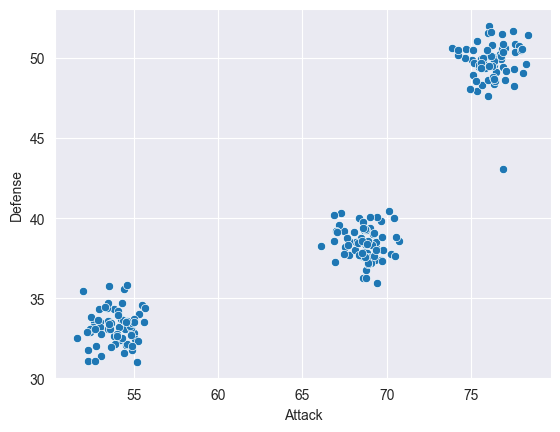

In [23]:
# загружаем данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
display(df.head())

# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

<Axes: xlabel='Attack', ylabel='Defense'>

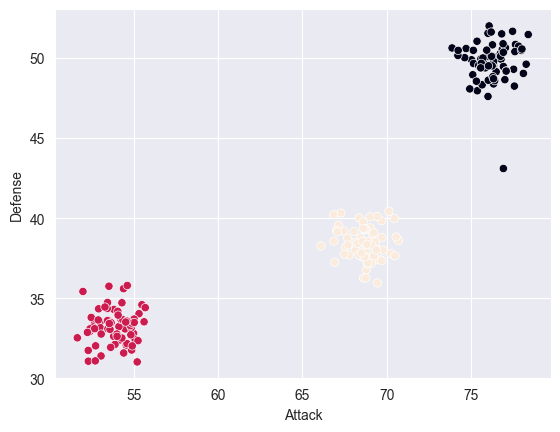

In [24]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

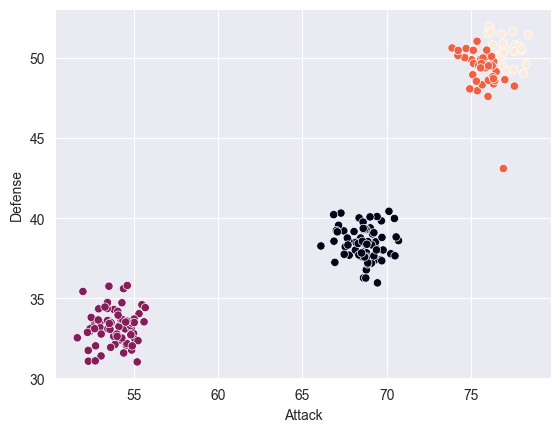

In [25]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

In [26]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

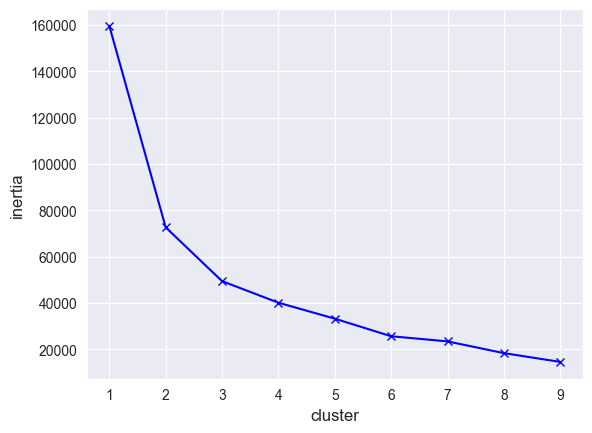

In [27]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

<Axes: xlabel='cluster', ylabel='silhouette'>

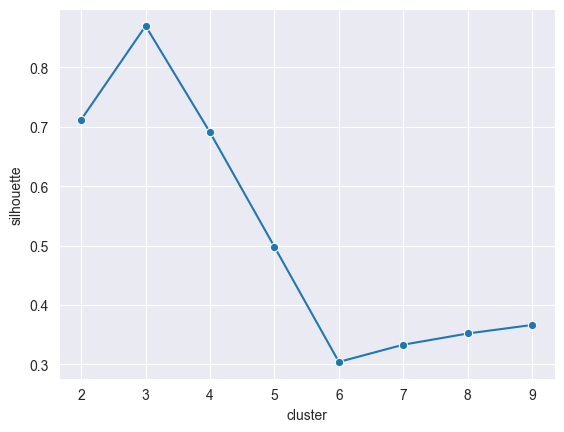

In [28]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [29]:
# #Задание 2.7

# data_27 = pd.read_csv('data/values_from_the_instrument.csv')

# # создадим пустой словарь, ключами будут инерция и количество кластеров
# silhouette_res = {"silhouette": [], "cluster": []}

# # выберем нужные данные 
# X = data_27[['x1', 'x2']]

# for cluster_num in range(2, 10):
#     silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
#     silhouette_res["cluster"].append(cluster_num)
    
# # сохраним в датафрейм значение силуэта и количество кластеров
# silhouette_df = pd.DataFrame(silhouette_res)

# # установим стиль для визуализиции
# sns.set_style("darkgrid")
# # визуализируем зависимость значения инерции от количества кластеров
# sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

# # инициализируем алгоритм k-means с количеством кластеров 3
# kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# # запустим обучение модели
# kmeans.fit(X)

# # предскажем, к какому кластеру принадлежат покемоны 
# predictions = kmeans.predict(X)
# # если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
# predictions = kmeans.labels_

# data_27['clusterization'] = predictions

# #визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
# sns.scatterplot(x=data_27.x1, y=data_27.x2, c=data_27.clusterization)

## Метрики

### Однородность кластеров

In [30]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0
1.0
1.0


### Полнота кластера

In [31]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0
0.8334191510029214


### V-мера

In [32]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


### Индекс Рэнда

In [33]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [34]:
# Задание 3.3

print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


### Иерархическая кластеризация

In [35]:
#Алгоритм иерархической кластеризации
from sklearn.cluster import AgglomerativeClustering

agglomerativeClustering = AgglomerativeClustering(n_clusters=2)
agglomerativeClustering.fit(X)

agglomerativeClustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

### EM-алгоритмы кластеризации

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |
 |  Gaussian Mixture.
 |
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |
 |  Read more in the :ref:`User Guide <gmm>`.
 |
 |  .. versionadded:: 0.18
 |
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |
 |      - 'full': each component has its own genera

<Axes: xlabel='Attack', ylabel='Defense'>

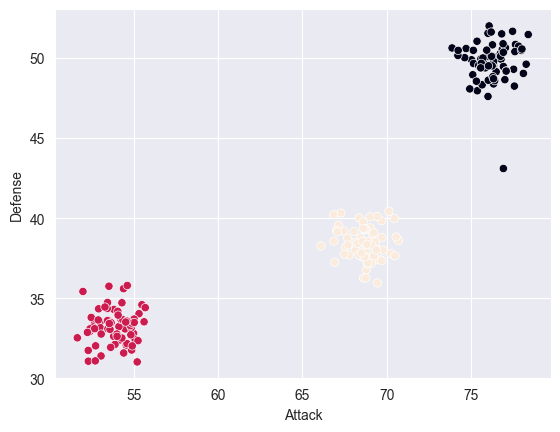

In [36]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

#Таким образом можно получить пояснение
help(GaussianMixture)

#визуализация результата
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

In [37]:
#Задание 5.4

housing = pd.read_csv('data/housing.csv')

# X = housing[['year', 'price']]

# gmm_clast = GaussianMixture(n_components=3, random_state=42)
# gmm_clast.fit(X)
# predicted_clasters = gmm_clast.predict(X)

# sns.scatterplot(x=housing.price, y=housing.year, c=predicted_clasters)

In [38]:
# #Задание 5.5

# kmeans_clast = KMeans(n_clusters=3, random_state=42)
# kmeans_clast.fit(X)

# predicted_clasters = kmeans_clast.predict(X)

# sns.scatterplot(x=housing.price, y=housing.year, c=predicted_clasters)

### Спектральная кластеризация

<Axes: xlabel='Attack', ylabel='Defense'>

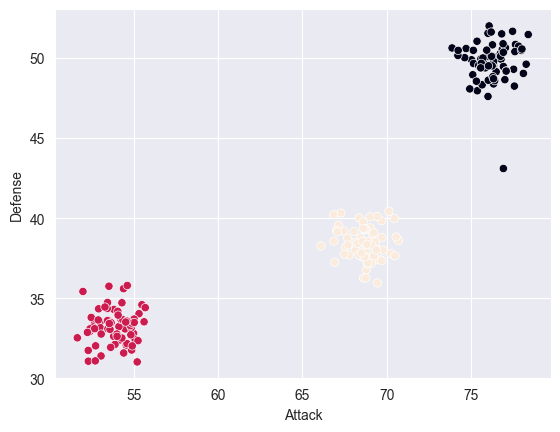

In [39]:
from sklearn.cluster import SpectralClustering

# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
spectral_clustering.fit(df[['Attack', 'Defense']])
# для 4х кластеров
spectral_clustering4k = SpectralClustering(n_clusters=4, random_state=42)
spectral_clustering4k.fit(df[['Attack', 'Defense']])

# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_
spectral_predictions4k = spectral_clustering4k.labels_

#визуализация результата
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

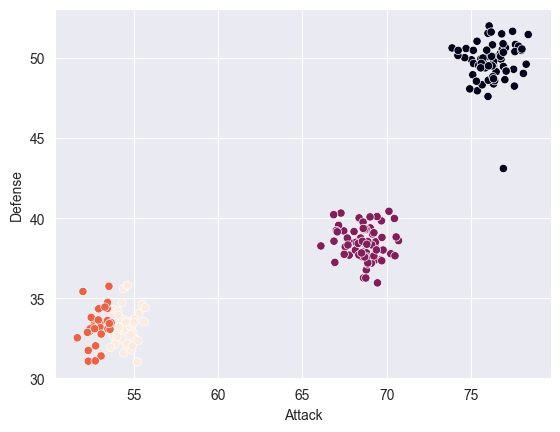

In [40]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions4k)

### Кластеризация на основе плотности (DBSCAN)

<Axes: xlabel='Attack', ylabel='Defense'>

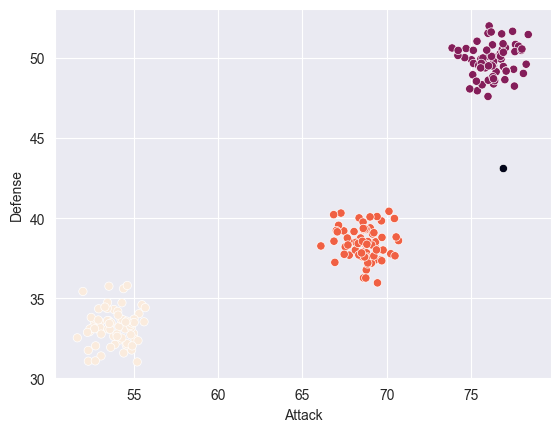

In [41]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

<Axes: xlabel='price', ylabel='year'>

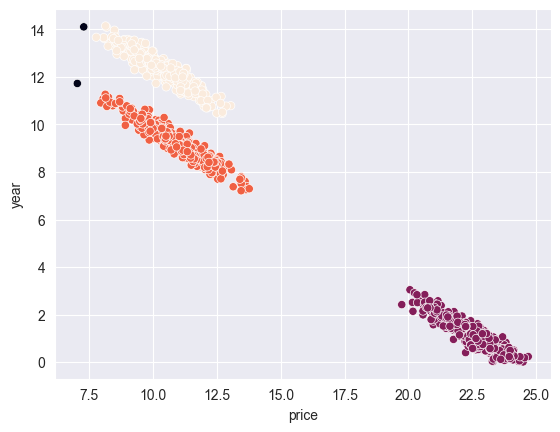

In [51]:
# Задание 7.5, 7.6

dbscan_clusterization = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusterization.fit(housing[['price', 'year']])

sns.scatterplot(x=housing.price, y=housing.year, c=dbscan_clusterization.labels_)